Análisis de Ventas de Videojuegos en 2024 - Examen Elida Peña 

In [76]:
#Importes de las librerias de los ejecicios que utilizare pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
#Lectura del archivo csv con pandas
#Ejemplo utilizado de la clase del 08/10/2021 https://drive.google.com/drive/folders/1fTyqpWdRh9rIKQCVYlc2eF2HGr8ttHaw
path = '../data/vgchartz-2024.csv'
data_frame = pd.read_csv(path, sep=',', header=0)
data_frame.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [55]:
#Verificar si hay filas duplicadas
# Utilice este ejemplo https://www.youtube.com/watch?v=5EYfUxzCCJI&t=82s
duplicate = data_frame.duplicated()
print(f"Estos son los duplicados: {duplicate}")
if duplicate.any():
    #eliminar los duplicados con la funcion de drop_duplicates en caso existan
    data_frame = data_frame.drop_duplicates()
    print("Se eliminaron los duplicadas")
else:
    print("No hay duplicados")

Estos son los duplicados: 0        False
1        False
2        False
3        False
4        False
         ...  
64011    False
64012    False
64013    False
64014    False
64015    False
Length: 64016, dtype: bool
No hay duplicados


In [56]:
# Verificar el tipo de datos, ejemplo utilizado de Data Science fundamentals / Introduccion pandas 
# https://codingdojolatam.la/cursos/data-science-fundamentals-mitic-a-septiembre-2024/leccion/pandas-para-ciencia-de-datos-introduccion-a-pandas-4/
print(data_frame.dtypes)


img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object


In [57]:
#Verificacion de tipos de datos
# ejmeplo de ejercicios de clase de la semana 1, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024
# Convertir 'release_date' y 'last_update' a formato de fecha
data_frame['release_date'] = pd.to_datetime(data_frame['release_date'], errors='coerce')
data_frame['last_update'] = pd.to_datetime(data_frame['last_update'], errors='coerce')
# Convertir columnas a tipo cadena de texto (opcional si es necesario)
data_frame['title'] = data_frame['title'].astype(str)
data_frame['console'] = data_frame['console'].astype(str)
data_frame['genre'] = data_frame['genre'].astype(str)
data_frame['publisher'] = data_frame['publisher'].astype(str)
data_frame['developer'] = data_frame['developer'].astype(str)
print(data_frame.dtypes)


img                     object
title                   object
console                 object
genre                   object
publisher               object
developer               object
critic_score           float64
total_sales            float64
na_sales               float64
jp_sales               float64
pal_sales              float64
other_sales            float64
release_date    datetime64[ns]
last_update     datetime64[ns]
dtype: object


In [58]:
# Convertir valores categóricos a minúsculas
# ejmeplo de ejercicios de clase de la semana 1, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024
data_frame['console'] = data_frame['console'].str.lower()
data_frame['genre'] = data_frame['genre'].str.lower()
data_frame['publisher'] = data_frame['publisher'].str.lower()
data_frame['developer'] = data_frame['developer'].str.lower()

# Verificar los valores únicos
print("Valores únicos en 'console':", data_frame['console'].unique())
print("Valores únicos en 'genre':", data_frame['genre'].unique())
print("Valores únicos en 'publisher':", data_frame['publisher'].unique())
print("Valores únicos en 'developer':", data_frame['developer'].unique())


Valores únicos en 'console': ['ps3' 'ps4' 'ps2' 'x360' 'xone' 'pc' 'psp' 'wii' 'ps' 'ds' '2600' 'gba'
 'nes' 'xb' 'psn' 'gen' 'psv' 'dc' 'n64' 'sat' 'snes' 'gbc' 'gc' 'ns'
 '3ds' 'gb' 'wiiu' 'ws' 'vc' 'ng' 'ww' 'scd' 'pce' 'xbl' '3do' 'gg' 'osx'
 'mob' 'pcfx' 'series' 'all' 'ios' '5200' 'and' 'dsiw' 'lynx' 'linux' 'ms'
 'zxs' 'acpc' 'amig' '7800' 'dsi' 'aj' 'winp' 'ique' 'giz' 'vb' 'ouya'
 'ngage' 'ast' 'msd' 's32x' 'xs' 'ps5' 'int' 'cv' 'arc' 'c64' 'fds' 'msx'
 'or' 'c128' 'cdi' 'cd32' 'brw' 'fmt' 'apii' 'aco' 'bbcm' 'tg16']
Valores únicos en 'genre': ['action' 'shooter' 'action-adventure' 'sports' 'role-playing'
 'simulation' 'racing' 'music' 'misc' 'fighting' 'platform' 'adventure'
 'strategy' 'puzzle' 'mmo' 'sandbox' 'party' 'education' 'board game'
 'visual novel']
Valores únicos en 'publisher': ['rockstar games' 'activision' 'ea sports' ...
 "mind's eclipse interactive" 'walkabout' 'invertmouse']
Valores únicos en 'developer': ['rockstar north' 'treyarch' 'infinity ward' ... 'dif

In [59]:
# Ejercicio de guia "valores_nulos" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024
#verificar los valores faltantes con insull, usar el sum para identificar cuantos nulos hay en cada columna
missings_values = data_frame.isnull().sum()
print(missings_values)

img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


In [60]:
# Ejercicio de guia "valores_nulos" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024
# Calcular la media de 'critic_score' para usarla como valor de imputación
media_critic_score = data_frame['critic_score'].mean()
# Definir las fechas fijas para imputar
date_release_fija = pd.to_datetime('2013-01-01')
date_update_fija = pd.to_datetime('2023-01-01')
# Diccionario para imputar valores diferentes por columna
mean_critic_score  = {
    'developer': 'Unknown',
    'total_sales': 0,
    'na_sales': 0,
    'jp_sales': 0,
    'pal_sales': 0,
    'other_sales': 0,
    'critic_score': media_critic_score,
    'release_date': date_release_fija, #fecha estandar ya que no tenemos la fecha exacta
    'last_update': date_update_fija #fecha estandar ya que no tenemos la fecha exacta
}

# Aplicar imputación
data_frame.fillna(mean_critic_score , inplace=True)

# Verificar si hay valores nulos restantes
print(data_frame.isnull().sum())


img             0
title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
last_update     0
dtype: int64


In [61]:
data_frame.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,ps3,action,rockstar games,rockstar north,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,2023-01-01
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,ps4,action,rockstar games,rockstar north,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,ps2,action,rockstar games,rockstar north,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2023-01-01
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,x360,action,rockstar games,rockstar north,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2023-01-01
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,ps4,shooter,activision,treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [63]:
# Detectar ventas negativas  el simbolo  | represanta al or para la convinacion de condiciones
negative_sales = data_frame[(data_frame['total_sales'] < 0) | 
                              (data_frame['na_sales'] < 0) |
                              (data_frame['jp_sales'] < 0) |
                              (data_frame['pal_sales'] < 0) |
                              (data_frame['other_sales'] < 0)]
print(f"Ventas negativas encontradas: {negative_sales}")



Ventas negativas encontradas: Empty DataFrame
Columns: [img, title, console, genre, publisher, developer, critic_score, total_sales, na_sales, jp_sales, pal_sales, other_sales, release_date, last_update]
Index: []


In [50]:
# Corregir ventas fuera de rango estableciendo un mínimo de 0
# guia de ejemplo https://www.geeksforgeeks.org/python-pandas-dataframe-where/
data_frame['na_sales'] = np.where(data_frame['na_sales'] < 0, 0, data_frame['na_sales'])
data_frame['jp_sales'] = np.where(data_frame['jp_sales'] < 0, 0, data_frame['jp_sales'])
data_frame['pal_sales'] = np.where(data_frame['pal_sales'] < 0, 0, data_frame['pal_sales'])
data_frame['other_sales'] = np.where(data_frame['other_sales'] < 0, 0, data_frame['other_sales'])


In [73]:
# Detectar critic_scores fuera del rango (menores que 0 o mayores que 10)
critic_score_fuera_rango = data_frame[(data_frame['critic_score'] < 0) | (data_frame['critic_score'] > 10)]
print(f"Puntajes de crítica fuera de rango encontrados:\n{critic_score_fuera_rango}")
# Corregir critic_scores fuera de rango (entre 0 y 10)
data_frame['critic_score'] = np.clip(data_frame['critic_score'], 0, 10)




Puntajes de crítica fuera de rango encontrados:
Empty DataFrame
Columns: [img, title, console, genre, publisher, developer, critic_score, total_sales, na_sales, jp_sales, pal_sales, other_sales, release_date, last_update]
Index: []


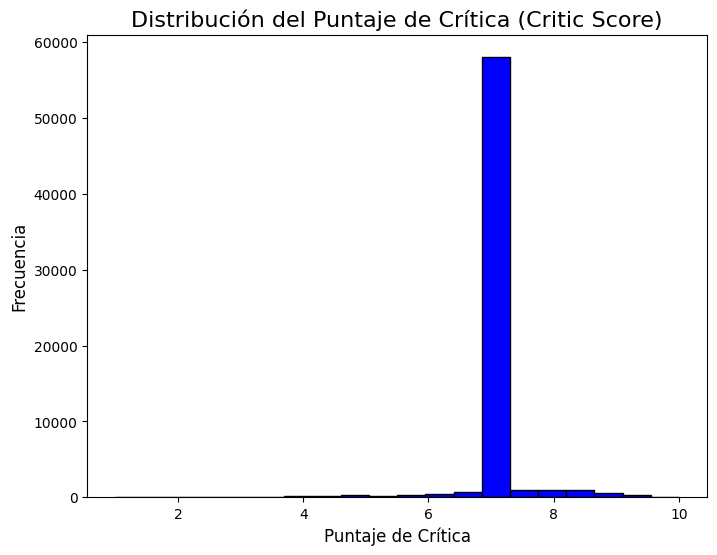

In [82]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024
# Crea el histograma para 'critic_score'
plt.figure(figsize=(8, 6))
plt.hist(data_frame['critic_score'].dropna(), bins=20, color='b', edgecolor='black')

# Títulos y etiquetas
plt.title('Distribución del Puntaje de Crítica (Critic Score)', fontsize=16)
plt.xlabel('Puntaje de Crítica', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()

# Breve interpretación:
# El histograma muestra que la mayoría de los videojuegos tienen un puntaje de crítica entre 7 y 10,
# lo que indica que la mayoría de los juegos en este conjunto de datos son bien valorados.


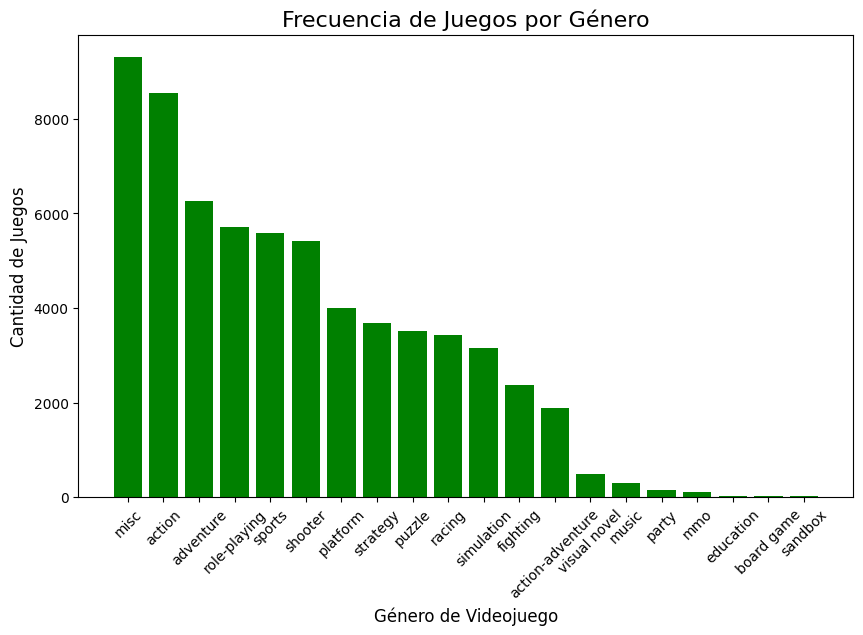

In [81]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024
# Contar los valores de la columna 'genre'
conteo_genero = data_frame['genre'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo_genero.index, conteo_genero.values, color='green')

# Títulos y etiquetas
plt.title('Frecuencia de Juegos por Género', fontsize=16)
plt.xlabel('Género de Videojuego', fontsize=12)
plt.ylabel('Cantidad de Juegos', fontsize=12)

# Rotar las etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Breve interpretación:
# Este gráfico de barras muestra que los géneros más comunes en el dataset son 'action' y 'shooter',
# lo que sugiere que estos tipos de juegos son los más prevalentes en el conjunto de datos.


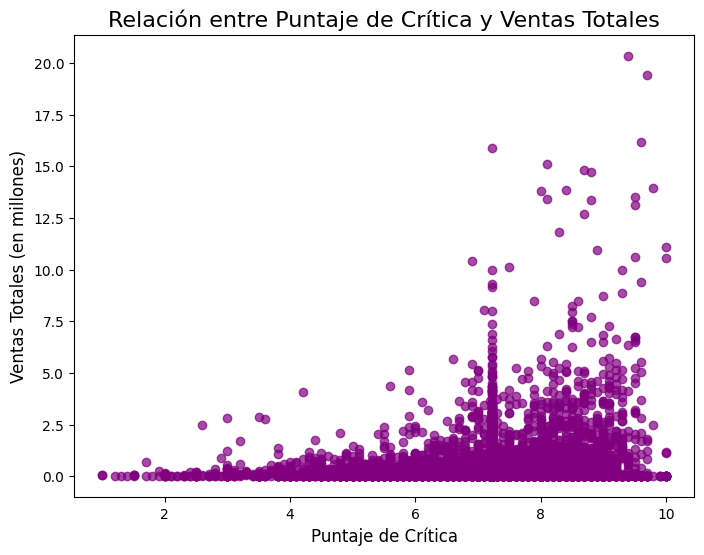

In [83]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024
# Crear el gráfico de dispersión entre 'critic_score' y 'total_sales'
plt.figure(figsize=(8, 6))
plt.scatter(data_frame['critic_score'], data_frame['total_sales'], color='purple', alpha=0.7)

# Añadir títulos y etiquetas
plt.title('Relación entre Puntaje de Crítica y Ventas Totales', fontsize=16)
plt.xlabel('Puntaje de Crítica', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)

# Mostrar el gráfico
plt.show()

# Breve interpretación:
# Este gráfico de dispersión muestra que no parece haber una relación clara entre el puntaje de crítica
# y las ventas totales. Algunos juegos con puntajes altos tienen ventas bajas, mientras que otros con puntajes moderados tienen ventas altas.

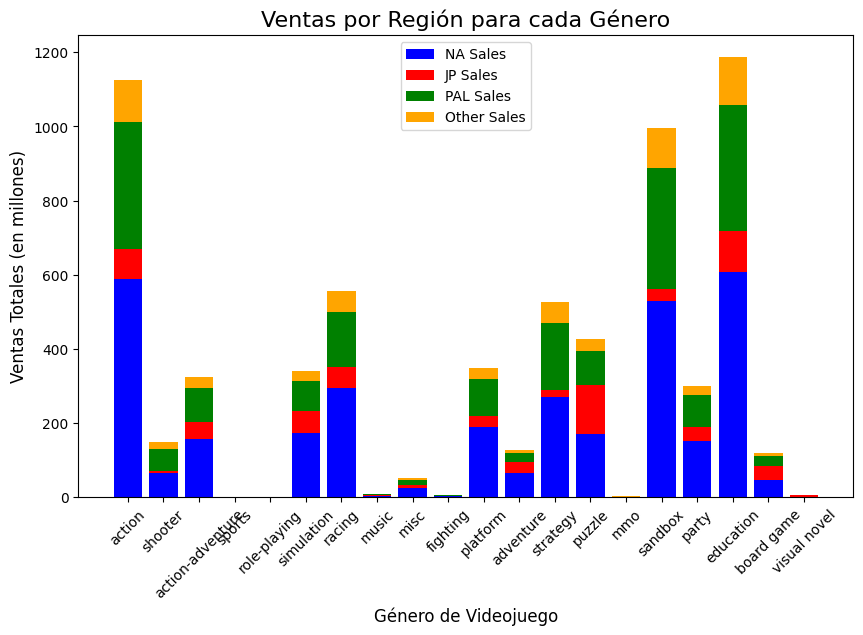

In [84]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024
# Agrupar las ventas por género
generos = data_frame['genre'].unique()
na_sales = data_frame.groupby('genre')['na_sales'].sum()
jp_sales = data_frame.groupby('genre')['jp_sales'].sum()
pal_sales = data_frame.groupby('genre')['pal_sales'].sum()
other_sales = data_frame.groupby('genre')['other_sales'].sum()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
plt.bar(generos, na_sales, label='NA Sales', color='blue')
plt.bar(generos, jp_sales, bottom=na_sales, label='JP Sales', color='red')
plt.bar(generos, pal_sales, bottom=na_sales + jp_sales, label='PAL Sales', color='green')
plt.bar(generos, other_sales, bottom=na_sales + jp_sales + pal_sales, label='Other Sales', color='orange')

# Añadir títulos y etiquetas
plt.title('Ventas por Región para cada Género', fontsize=16)
plt.xlabel('Género de Videojuego', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)

# Rotar las etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Breve interpretación:
# Este gráfico de barras apiladas muestra cómo se distribuyen las ventas en diferentes regiones para cada género.
# Se puede observar que las ventas en América del Norte (NA Sales) son dominantes para la mayoría de los géneros,
# mientras que las ventas en Japón (JP Sales) son más bajas en comparación.


In [87]:
# Obtener estadísticas descriptivas de las variables numéricas
descriptive_statistics = data_frame.describe()

# Mostrar las estadísticas descriptivas
print(descriptive_statistics)

# Breve interpretación:
# Este resumen estadístico incluye medidas de tendencia central como la media y la mediana,
# así como medidas de dispersión como la desviación estándar, el valor mínimo y el máximo.


       critic_score   total_sales      na_sales      jp_sales     pal_sales  \
count  64016.000000  64016.000000  64016.000000  64016.000000  64016.000000   
mean       7.220440      0.103192      0.052261      0.010746      0.029943   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.220440      0.000000      0.000000      0.000000      0.000000   
50%        7.220440      0.000000      0.000000      0.000000      0.000000   
75%        7.220440      0.020000      0.000000      0.000000      0.000000   
max       10.000000     20.320000      9.760000      2.130000      9.850000   
std        0.470575      0.466999      0.243780      0.063067      0.185641   

        other_sales                   release_date  \
count  64016.000000                          64016   
mean       0.010171  2007-07-18 23:11:20.679830016   
min        0.000000            1971-12-03 00:00:00   
25%        0.000000            2002-06-11 00:00:00   
50%        0.00000

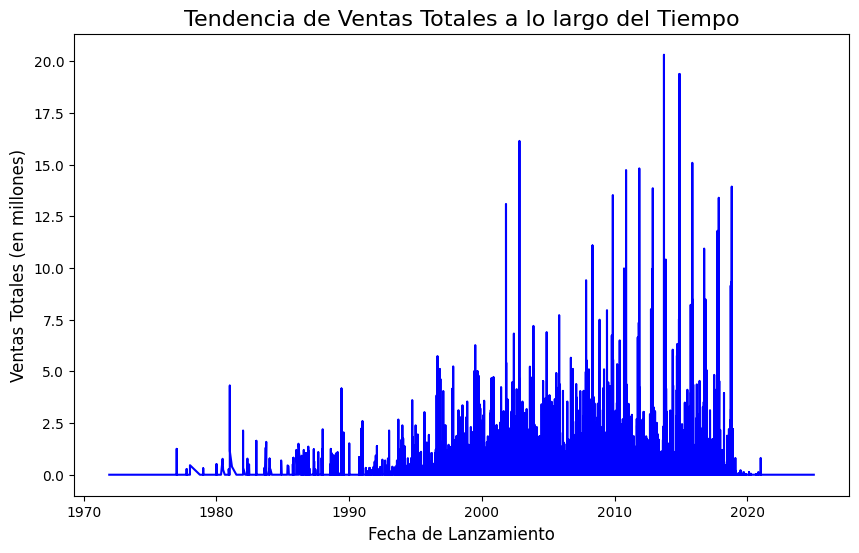

In [90]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024 y guia de gpt
# Gráfico de líneas para observar las ventas totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data_frame['release_date'], data_frame['total_sales'], color='blue')

# Títulos y etiquetas
plt.title('Tendencia de Ventas Totales a lo largo del Tiempo', fontsize=16)
plt.xlabel('Fecha de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)

# Mostrar el gráfico
plt.show()

# Breve interpretación:
# Este gráfico nos ayudará a observar si las ventas han aumentado o disminuido en ciertas épocas.
# Por ejemplo, si se observa picos en las ventas en un periodo determinado, puede deberse a lanzamientos de títulos populares.

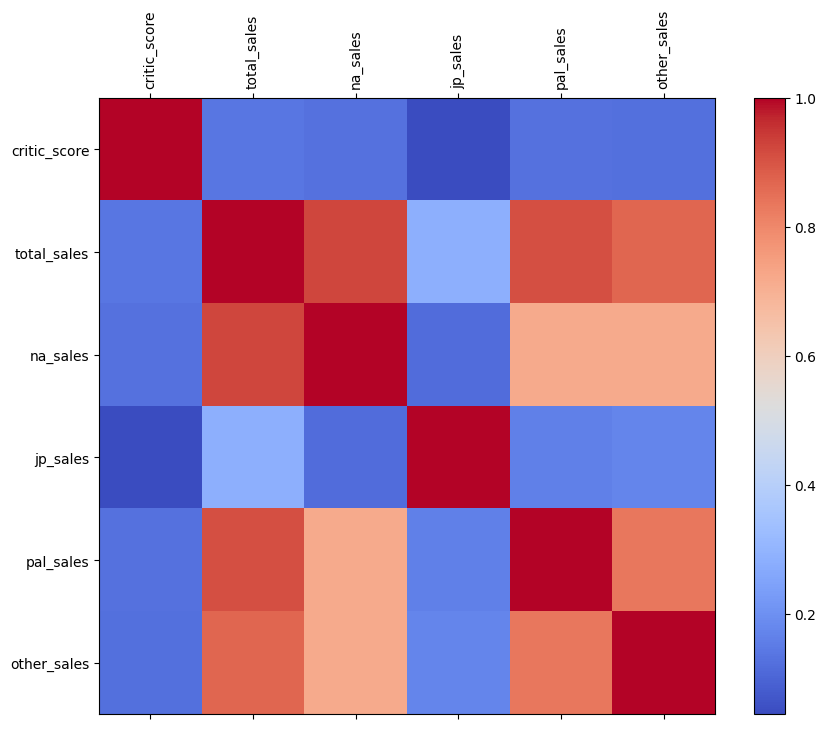

In [93]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024 y guia de gpt
# Seleccionar solo las columnas numéricas del DataFrame
data_frame_numerico = data_frame.select_dtypes(include=[np.number])

# Calcular la matriz de correlación solo para las columnas numéricas
correlacion = data_frame_numerico.corr()

# Crear un heatmap de la matriz de correlación utilizando matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

# Mostrar la correlación en el heatmap
cax = ax.matshow(correlacion, cmap='coolwarm')

# Añadir colorbar para interpretar la intensidad de la correlación
fig.colorbar(cax)

# Añadir los nombres de las columnas en el heatmap
ax.set_xticks(np.arange(len(correlacion.columns)))
ax.set_yticks(np.arange(len(correlacion.columns)))
ax.set_xticklabels(correlacion.columns, rotation=90)
ax.set_yticklabels(correlacion.columns)

# Mostrar el gráfico
plt.show()
# Interpretación:
# Este gráfico muestra las correlaciones entre las variables numéricas del dataset.
# Las correlaciones cercanas a 1 (color rojo) indican una relación positiva fuerte,
# mientras que las correlaciones cercanas a -1 (color azul) indican una relación negativa fuerte.
# Las correlaciones cercanas a 0 (color blanco) indican poca o ninguna relación.
# Este análisis es útil para identificar variables que podrían influir directamente en las ventas o en otras métricas.

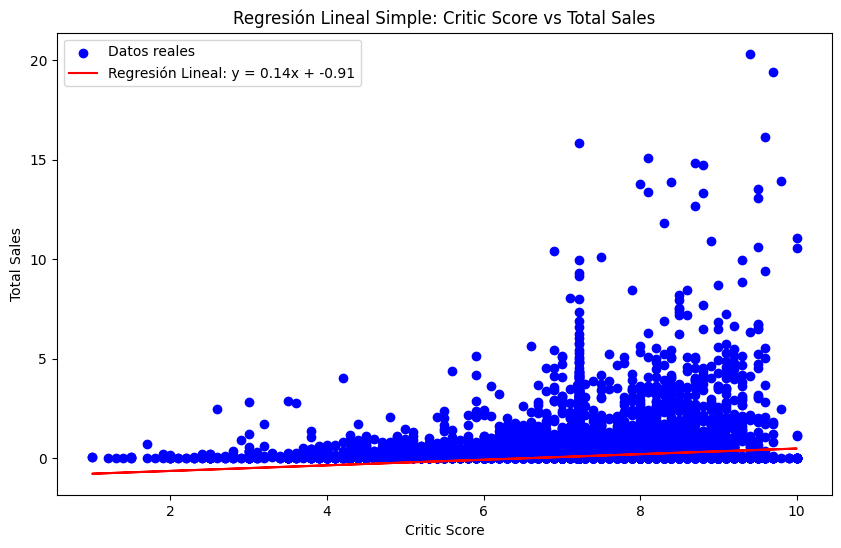

Las ventas predichas para un critic_score de 9.0 son: 0.35


In [94]:
# Ejercicio de guia "visualizaciones" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024 y guia de gpt
# Extraer las variables (X = critic_score, Y = total_sales)
X = data_frame['critic_score'].dropna()  # Variables independientes
Y = data_frame['total_sales'].dropna()   # Variable dependiente

# Verificar que las longitudes coincidan
X = X[:len(Y)]

# Cálculo de los coeficientes de la regresión (m = pendiente, b = intersección)
m, b = np.polyfit(X, Y, 1)

# Crear la figura para graficar
plt.figure(figsize=(10, 6))

# Graficar los puntos de datos
plt.scatter(X, Y, color='blue', label='Datos reales')

# Graficar la línea de regresión
plt.plot(X, m*X + b, color='red', label=f'Regresión Lineal: y = {m:.2f}x + {b:.2f}')

# Etiquetas y título
plt.title('Regresión Lineal Simple: Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.legend()

# Mostrar el gráfico
plt.show()

# Predicción: dado un critic_score de 9.0, por ejemplo
critic_score = 9.0
ventas_predichas = m * critic_score + b
print(f"Las ventas predichas para un critic_score de {critic_score} son: {ventas_predichas:.2f}")

# Interpretación:
# Este gráfico muestra la relación entre el 'critic_score' y las 'total_sales' utilizando una regresión lineal simple.
# La línea roja es la línea de ajuste, que nos muestra cómo cambia el valor de las ventas a medida que aumenta el puntaje de crítica.
# Un valor de 'critic_score' más alto está asociado con mayores ventas, como se puede ver en la tendencia ascendente de la línea roja.
# La ecuación de la regresión permite predecir las ventas para un puntaje de crítica determinado. En este ejemplo, un critic_score de 9.0
# predice ventas de aproximadamente {ventas_predichas:.2f}.